In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HomeMade as hm
import importlib
import pandas as pd

In [2]:
df = pd.read_pickle('ks_predictions.dat')
df.head()

,v0_ks_mass,v0_ks_massErr,ML1_data,ML2_data,ML12_data,ML1_MC,ML2_MC,ML12_MC
entry,,,,,,,,
4704896,521.186951,15.050436,0.789591,0.755486,0.786765,0.994010,0.999004,0.999766
4704899,432.290253,8.782795,0.792817,0.783190,0.820879,0.995022,0.962926,0.995481
4704900,452.477722,8.867375,0.756234,0.764244,0.822262,0.974884,0.984198,0.988335
4704901,470.771179,8.400566,0.773028,0.808131,0.792001,0.873620,0.984124,0.985919
4704902,517.689758,8.674057,0.739633,0.721201,0.702930,0.937822,0.996806,0.999143


In [ ]:
df.head()
df.iloc[:,2:] = 1-df.iloc[:,2:]
df.head()

In [243]:
hm = importlib.reload(hm)
Npoints = 120
auc, cuts, x, y = hm.roc_curve_data(df.v0_ks_mass,df.ML12_MC,Npoints=Npoints,bins=200,verbose=False)
auc1, cuts1, x1, y1 = hm.roc_curve_data(df.v0_ks_mass,df.ML1_MC,Npoints=Npoints,bins=200,verbose=False)
auc2, cuts2, x2, y2 = hm.roc_curve_data(df.v0_ks_mass,df.ML2_MC,Npoints=Npoints,bins=200,verbose=False)

No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!


In [244]:
def draw_mass_dist(p,cuts,cut_index):
    p_cut = np.sort(p)[::-1][cuts[cut_index]]
    vals,binc,binw = hm.hist(df.v0_ks_mass[p>=p_cut],bins=200)
    return binc, vals

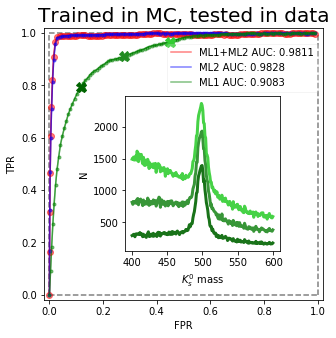

In [251]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set(xlim = (-0.02, 1.02), ylim = (-0.02, 1.02),
      xlabel='FPR',ylabel='TPR')
ax.set_title('Trained in MC, tested in data',fontsize=20)
ax.vlines([0,1],0,1,ls='--',color='gray',zorder=-1)
ax.hlines([0,1],0,1,ls='--',color='gray',zorder=-1)

ax.plot(x,y,c='r',alpha=0.5,label=f'ML1+ML2 AUC: {np.trapz(y, x):.4f}')
ax.plot(x2,y2,c='b',alpha=0.5,label=f'ML2 AUC: {np.trapz(y2, x2):.4f}')
ax.plot(x1,y1,c='g',alpha=0.5,label=f'ML1 AUC: {np.trapz(y1, x1):.4f}')

ax.plot(x,y,c='r',marker='o',alpha=0.5)
ax.plot(x2,y2,c='b',marker='.',alpha=0.5)
ax.plot(x1,y1,c='g',marker='.',alpha=0.5)
# ax.plot(1-x1,1-y1,c='g',marker='o',alpha=0.5)

ax.legend(loc='upper right',framealpha=0.2,bbox_to_anchor=(1,0.96))

ad = fig.add_axes((0.35,0.26,0.43,0.43))
ad.set(xlabel='$K_s^0$ mass',ylabel='N')

# cut_index = 4
# ad.plot(*draw_mass_dist(df.ML12_MC,cuts,cut_index),c='r',linewidth=3,alpha=0.5)
# ax.plot(x[cut_index],y[cut_index],c='r',marker='X',markersize=10)

# cut_index2 = 3
# ad.plot(*draw_mass_dist(df.ML2_MC,cuts2,cut_index2),c='b',linewidth=3,alpha=0.5)
# ax.plot(x2[cut_index2],y2[cut_index2],c='b',marker='X',markersize=10)

cut_index1 = 18
ad.plot(*draw_mass_dist(df.ML1_MC,cuts1,cut_index1),c='darkgreen',linewidth=3,alpha=0.9)
ax.plot(x1[cut_index1],y1[cut_index1],c='darkgreen',marker='X',markersize=10)
cut_index1 = 37
ad.plot(*draw_mass_dist(df.ML1_MC,cuts1,cut_index1),c='forestgreen',linewidth=3,alpha=0.9)
ax.plot(x1[cut_index1],y1[cut_index1],c='forestgreen',marker='X',markersize=10)
cut_index1 = 57
ad.plot(*draw_mass_dist(df.ML1_MC,cuts1,cut_index1),c='limegreen',linewidth=3,alpha=0.9)
ax.plot(x1[cut_index1],y1[cut_index1],c='limegreen',marker='X',markersize=10)

In [252]:
# fig.savefig('figures/3roc_curves_mc_trained.pdf')

In [233]:
hm = importlib.reload(hm)
Npoints = 120
auc, cuts, x, y = hm.roc_curve_data(df.v0_ks_mass,df.ML12_data,Npoints=Npoints,bins=200,verbose=False)
auc1, cuts1, x1, y1 = hm.roc_curve_data(df.v0_ks_mass,df.ML1_data,Npoints=Npoints,bins=200,verbose=False)
auc2, cuts2, x2, y2 = hm.roc_curve_data(df.v0_ks_mass,df.ML2_data,Npoints=Npoints,bins=200,verbose=False)

No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!


C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1741: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1742: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!


In [235]:
auc, auc1, auc2

(0.9970304976604809, 0.9609486763190515, 0.9930405882101434)

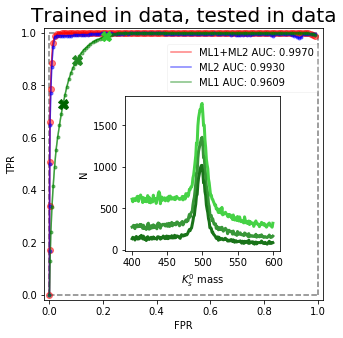

In [241]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set(xlim = (-0.02, 1.02), ylim = (-0.02, 1.02),
      xlabel='FPR',ylabel='TPR')
ax.set_title('Trained in data, tested in data',fontsize=20)
ax.vlines([0,1],0,1,ls='--',color='gray',zorder=-1)
ax.hlines([0,1],0,1,ls='--',color='gray',zorder=-1)

ax.plot(x,y,c='r',alpha=0.5,label=f'ML1+ML2 AUC: {auc:.4f}')
ax.plot(x2,y2,c='b',alpha=0.5,label=f'ML2 AUC: {auc2:.4f}')
ax.plot(x1,y1,c='g',alpha=0.5,label=f'ML1 AUC: {auc1:.4f}')

ax.plot(x,y,c='r',marker='o',alpha=0.5)
ax.plot(x2,y2,c='b',marker='.',alpha=0.5)
ax.plot(x1,y1,c='g',marker='.',alpha=0.5)
# ax.plot(1-x1,1-y1,c='g',marker='o',alpha=0.5)

ax.legend(loc='upper right',framealpha=0.2,bbox_to_anchor=(1,0.96))

ad = fig.add_axes((0.35,0.26,0.43,0.43))
ad.set(xlabel='$K_s^0$ mass',ylabel='N')

# cut_index = 4
# ad.plot(*draw_mass_dist(df.ML12_MC,cuts,cut_index),c='r',linewidth=3,alpha=0.5)
# ax.plot(x[cut_index],y[cut_index],c='r',marker='X',markersize=10)

# cut_index2 = 3
# ad.plot(*draw_mass_dist(df.ML2_MC,cuts2,cut_index2),c='b',linewidth=3,alpha=0.5)
# ax.plot(x2[cut_index2],y2[cut_index2],c='b',marker='X',markersize=10)

cut_index1 = 10
ad.plot(*draw_mass_dist(df.ML1_MC,cuts1,cut_index1),c='darkgreen',linewidth=3,alpha=0.9)
ax.plot(x1[cut_index1],y1[cut_index1],c='darkgreen',marker='X',markersize=10)
cut_index1 = 17
ad.plot(*draw_mass_dist(df.ML1_MC,cuts1,cut_index1),c='forestgreen',linewidth=3,alpha=0.9)
ax.plot(x1[cut_index1],y1[cut_index1],c='forestgreen',marker='X',markersize=10)
cut_index1 = 30
ad.plot(*draw_mass_dist(df.ML1_MC,cuts1,cut_index1),c='limegreen',linewidth=3,alpha=0.9)
ax.plot(x1[cut_index1],y1[cut_index1],c='limegreen',marker='X',markersize=10)

In [242]:
# fig.savefig('figures/3roc_curves_data_trained.pdf')

[Text(0, 0.5, 'ML2 prediction scores'), Text(0.5, 0, 'ML1 prediction scores')]

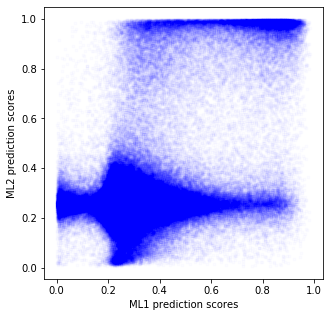

In [207]:
p1 = 1-df.ML1_data
p2 = 1-df.ML2_data

# p1 = p1 - p1.min()
# p1 = p1/p1.max()

# p2 = p2 - p2.min()
# p2 = p2/p2.max()

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(p1,p2,'b.',alpha=0.01)
ax.set(xlabel='ML1 prediction scores',ylabel='ML2 prediction scores')

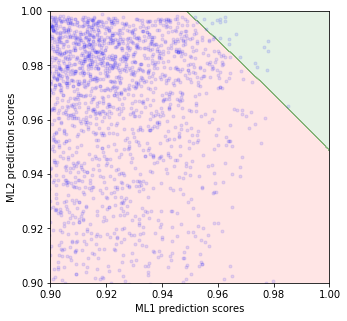

In [208]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(p1,p2,'b.',alpha=0.1)
ax.set(xlabel='ML1 prediction scores',ylabel='ML2 prediction scores',xlim=(0.9,1),ylim=(0.9,1))
mesh = np.meshgrid(np.linspace(0.9,1,30),np.linspace(0.9,1,30))
mesh = np.mgrid[0.9:1:0.1/2000,0.9:1:0.1/2000]
ax.contourf(mesh[0],mesh[1],np.where(mesh[0]**2 + mesh[1]**2 > 1.9,1,0),alpha=0.1,colors=['red','green']+5*['green'])

In [234]:
indeces = np.argsort(p1**2 + p2**2)[::-1]

Text(0.5, 1.0, 'Weighted mean of 100 most likely K-Short candidates')

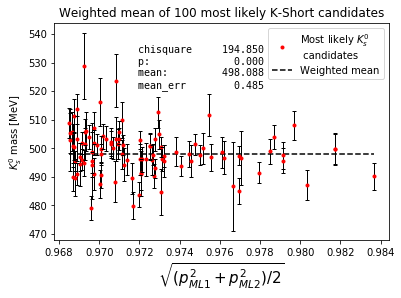

In [283]:
hm = importlib.reload(hm)

fig, ax = plt.subplots()
d = hm.weighted_mean(df.iloc[indeces[:100]].v0_ks_mass,df.iloc[indeces[:100]].v0_ks_massErr,
                     ax=ax,plot_ticks=np.sqrt((p1**2 + p2**2)/2).iloc[indeces[:100]],
                    coords=(0.25,0.9), point_label='Most likely $K_s^0$ \n candidates')
ax.set_xlabel('$\sqrt{(p_{ML1}^2 + p_{ML2}^2)/2}$',fontsize=15)
ax.set_ylabel('$K_s^0$ mass [MeV]')
ax.set_title('Weighted mean of 100 most likely K-Short candidates')

In [284]:
# fig.savefig('figures/K_short_mass_result2.pdf')

In [261]:
hm = importlib.reload(hm)

masses = []
errs = []
chi2s = []
pvals = []

the_range = range(600,4,-20)
for i in the_range:
    mass, err, d = hm.weighted_mean(df.iloc[indeces[:i]].v0_ks_mass,df.iloc[indeces[:i]].v0_ks_massErr)
    masses.append(mass)
    errs.append(err)
    chi2s.append(d['chi2'])
    pvals.append(d['p'])

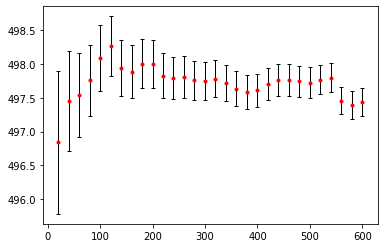

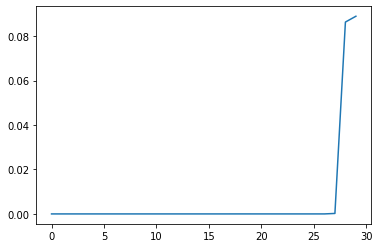

In [262]:
fig, ax = plt.subplots()

ax.plot(the_range,masses,'r.')
ax.errorbar(the_range,masses,errs,c='k',elinewidth=1,capsize=2,ls='none')

fig, ax = plt.subplots()
ax.plot(pvals)

In [21]:
df.head()

,v0_ks_mass,v0_ks_massErr,ML1_data,ML2_data,ML12_data,ML1_MC,ML2_MC,ML12_MC
entry,,,,,,,,
4704896,521.186951,15.050436,0.789591,0.755486,0.786765,0.994010,0.999004,0.999766
4704899,432.290253,8.782795,0.792817,0.783190,0.820879,0.995022,0.962926,0.995481
4704900,452.477722,8.867375,0.756234,0.764244,0.822262,0.974884,0.984198,0.988335
4704901,470.771179,8.400566,0.773028,0.808131,0.792001,0.873620,0.984124,0.985919
4704902,517.689758,8.674057,0.739633,0.721201,0.702930,0.937822,0.996806,0.999143


In [222]:
np.trapz(y1,x1)

0.9525042737237472

In [217]:
# df.iloc[:,2:] = 1-df.iloc[:,2:]
df.head()

,v0_ks_mass,v0_ks_massErr,ML1_data,ML2_data,ML12_data,ML1_MC,ML2_MC,ML12_MC
entry,,,,,,,,
4704896,521.186951,15.050436,0.210409,0.244514,0.213235,0.005990,0.000996,0.000234
4704899,432.290253,8.782795,0.207183,0.216810,0.179121,0.004978,0.037074,0.004519
4704900,452.477722,8.867375,0.243766,0.235756,0.177738,0.025116,0.015802,0.011665
4704901,470.771179,8.400566,0.226972,0.191869,0.207999,0.126380,0.015876,0.014081
4704902,517.689758,8.674057,0.260367,0.278799,0.297070,0.062178,0.003194,0.000857


In [110]:
Npoints=120
auc1, cuts1, x1, y1 = hm.roc_curve_data(df.v0_ks_mass,df.ML1_data,Npoints=Npoints,bins=200,verbose=False)
auc2, cuts2, x2, y2 = hm.roc_curve_data(df.v0_ks_mass,df.ML2_data,Npoints=Npoints,bins=200,verbose=False)

No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!


C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1741: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1742: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!


In [130]:
def hist(mass,bins=None,range=None,N_mask=1):
    vals, binc, binw = hm.hist(mass,bins=bins,range=range)
    mask = vals >= N_mask
    return binc[mask], vals[mask], np.sqrt(vals[mask])

def get_p(p,cuts,cut_index):
    return np.sort(p)[::-1][cuts[cut_index]]

def change_axes_color(ax,color='r'):
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color) 
    ax.spines['right'].set_color(color)
    ax.spines['left'].set_color(color)

[(390.0, 610.0)]

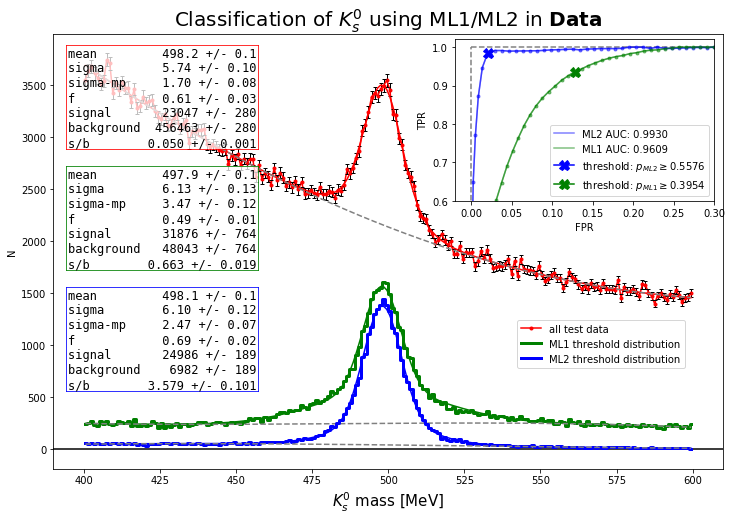

In [227]:
hm = importlib.reload(hm)

def plot_mass(mass,ax,bins=200,c='r',err_bars=False,alpha=1,second_axis=None,label=None):
    binc, vals, errs = hist(mass,bins=bins)
    d = hm.fit_mass2(binc, vals, errs, plot=False,second_axis=second_axis)
    
    if err_bars:
        ax.plot(binc, vals, c=c, marker='.',label=label)
        ax.errorbar(binc, vals, errs, color = 'k', elinewidth = 1, capsize = 2, ls = 'none')
    else:
        ax.step(binc,vals,where='mid',c=c,linewidth=3,label=label)
    
    ax.plot(binc,d['sig_func'](binc)+d['bkgr_func'](binc), c+'-',alpha=alpha)
    ax.plot(binc,d['bkgr_func'](binc), c='grey',ls='--',alpha=alpha)
    
    return

fig, ax = plt.subplots(figsize=(12,8))


ad = fig.add_axes((0.59,0.59,0.3,0.28))

ad.set(xlim = (-0.02, 0.3), ylim = (0.6, 1.02),
      xlabel='FPR',ylabel='TPR')

ad.vlines([0,1],0,1,ls='--',color='gray',zorder=-1)
ad.hlines([0,1],0,1,ls='--',color='gray',zorder=-1)
ad.plot(x2,y2,c='b',alpha=0.5,label=f'ML2 AUC: {np.trapz(np.append(y2, 1), np.append(x2, 1)):.4f}')
ad.plot(x1,y1,c='g',alpha=0.5,label=f'ML1 AUC: {np.trapz(np.append(y1, 1), np.append(x1, 1)):.4f}')
ad.plot(x2,y2,c='b',marker='.',alpha=0.5)
ad.plot(x1,y1,c='g',marker='.',alpha=0.5)

cut_index2 = 8
p2_cut = get_p(df.ML2_data,cuts2,cut_index2)
ad.plot(x2[cut_index2],y2[cut_index2],c='b',marker='X',markersize=10,label='threshold: $p_{ML2}\geq$'+f'{p2_cut:.4f}')

cut_index1 = 20
p1_cut = get_p(df.ML1_data,cuts1,cut_index1)
ad.plot(x1[cut_index1],y1[cut_index1],c='g',marker='X',markersize=10,label='threshold: $p_{ML1}\geq$'+f'{p1_cut:.4f}')

ad.legend()


adall = fig.add_axes((0.14,0.59+0.09,0.222,0.155+0.025)) #original (0.14,0.59,0.221,0.155)
adall.set(xticks=[],yticks=[])
change_axes_color(adall,'r')
plot_mass(df.v0_ks_mass,ax,c='r',err_bars=True,second_axis=adall,label='all test data')
adall.patch.set_alpha(0.75)

ad1 = fig.add_axes((0.14,0.41+0.06,0.222,0.155+0.025))
ad1.set(xticks=[],yticks=[])
change_axes_color(ad1,'g')
plot_mass(df.v0_ks_mass[df.ML1_data>=p1_cut],ax,c='g',second_axis=ad1,label='ML1 threshold distribution')
ad1.patch.set_alpha(0.75)

ad2 = fig.add_axes((0.14,0.23+0.03,0.222,0.155+0.025))
ad2.set(xticks=[],yticks=[])
change_axes_color(ad2,'b')
plot_mass(df.v0_ks_mass[df.ML2_data>=p2_cut],ax,c='b',second_axis=ad2,label='ML2 threshold distribution')

ax.set_title(r'Classification of $K_s^0$ using ML1/ML2 in $\bf{Data}$',fontsize=20)
ax.set_xlabel('$K_s^0$ mass [MeV]',fontsize=15)
ax.set_ylabel('N',fontsize=10)
ax.legend(loc=4,bbox_to_anchor=(0.95,0.22))

ax.hlines(0,*(380.0, 620.0),'k')
ax.set(xlim=(390.0, 610.0))
# ax.text(550,500,'Data',fontsize=50)

In [225]:
np.trapz(np.append(y1, 1), np.append(x1, 1)), 

(0.9609486763190515, 0.9930405882101434)

In [228]:
# fig.tight_layout()
# fig
# fig.savefig('figures/Moneyplot1_ks_classification.pdf')

In [129]:
def change_axes_color(ax,color='r'):
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color) 
    ax.spines['right'].set_color(color)
    ax.spines['left'].set_color(color)

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [74]:
x1[20], get_p(df.ML1_data,cuts1,69)

(0.2497294159806922, 0.8599274)

In [66]:
cut_index2 = 0
def get_p(p,cuts,cut_index):
    return np.sort(p)[cuts[cut_index]]
get_p(df.ML2_data,cuts2,cut_index2)

0.004665673